In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [87]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (10, 6)

In [88]:
DATA_PATH = "../data/FuelConsumption.csv"

In [89]:
def load_data(file_path):
	df = pd.read_csv(file_path)
	return df

In [90]:
df = load_data(DATA_PATH)

In [91]:
def clean_data(df):
    df = df.copy()
    
    df = df.drop_duplicates()
    
    df = df.dropna()
    
    return df

df = clean_data(df)

In [92]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [93]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [94]:
df_Model = df['MODEL'].value_counts().reset_index()[:10]
df_Model

,MODEL,count
0,F150 FFV,8
1,F150 FFV 4X4,8
2,FOCUS FFV,6
3,ACCORD,6
4,BEETLE,6
5,SILVERADO,5
6,SILVERADO 4WD,5
7,MUSTANG,5
8,SIERRA,5
9,SIERRA 4WD,5


In [95]:

engine_grouped = df.groupby(['CYLINDERS', 'ENGINESIZE'])[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].mean()
engine_grouped.reset_index()[:11]

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,3,1.0,6.400000,147.000000
1,3,1.2,6.200000,142.500000
2,4,1.0,6.600000,152.000000
3,4,1.2,6.900000,159.000000
4,4,1.3,6.200000,143.000000
5,4,1.4,7.836667,180.200000
6,4,1.5,7.091667,163.083333
7,4,1.6,8.289231,190.630769
8,4,1.8,7.843243,180.459459
9,4,2.0,9.025949,207.170886


In [96]:
df_CYLINDERS = df['CYLINDERS'].value_counts().reset_index()
df_CYLINDERS

,CYLINDERS,count
0,4,420
1,6,356
2,8,252
3,12,17
4,10,9
5,5,9
6,3,4


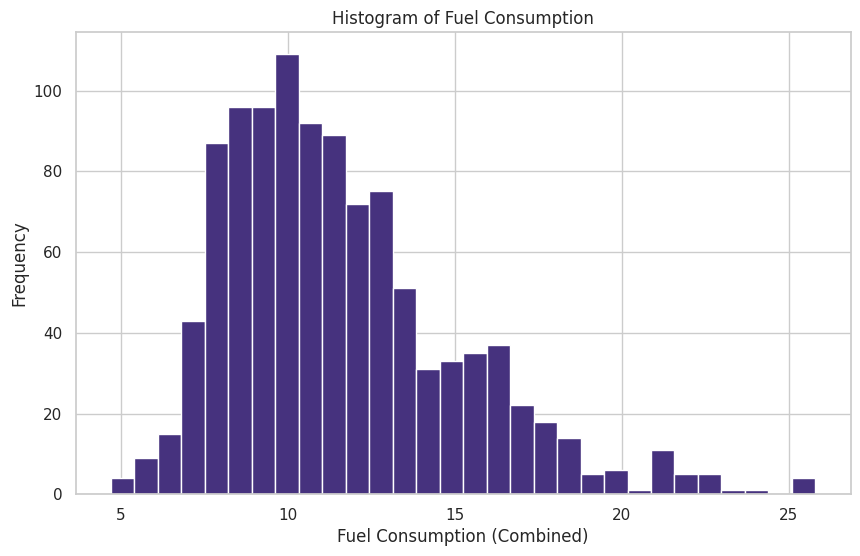

In [97]:
plt.hist(df["FUELCONSUMPTION_COMB"], bins=30)

plt.xlabel("Fuel Consumption (Combined)")
plt.ylabel("Frequency")
plt.title("Histogram of Fuel Consumption")

plt.show()

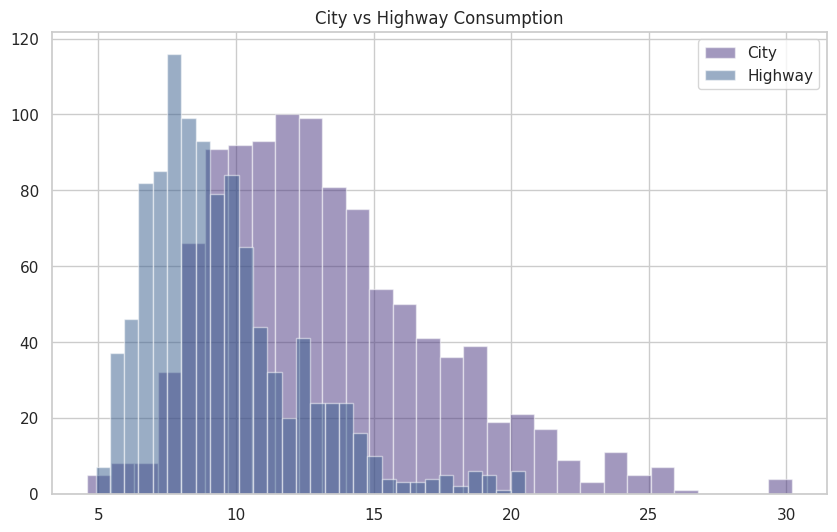

In [98]:
plt.hist(df["FUELCONSUMPTION_CITY"], bins=30, alpha=0.5)
plt.hist(df["FUELCONSUMPTION_HWY"], bins=30, alpha=0.5)

plt.legend(["City", "Highway"])
plt.title("City vs Highway Consumption")

plt.show()


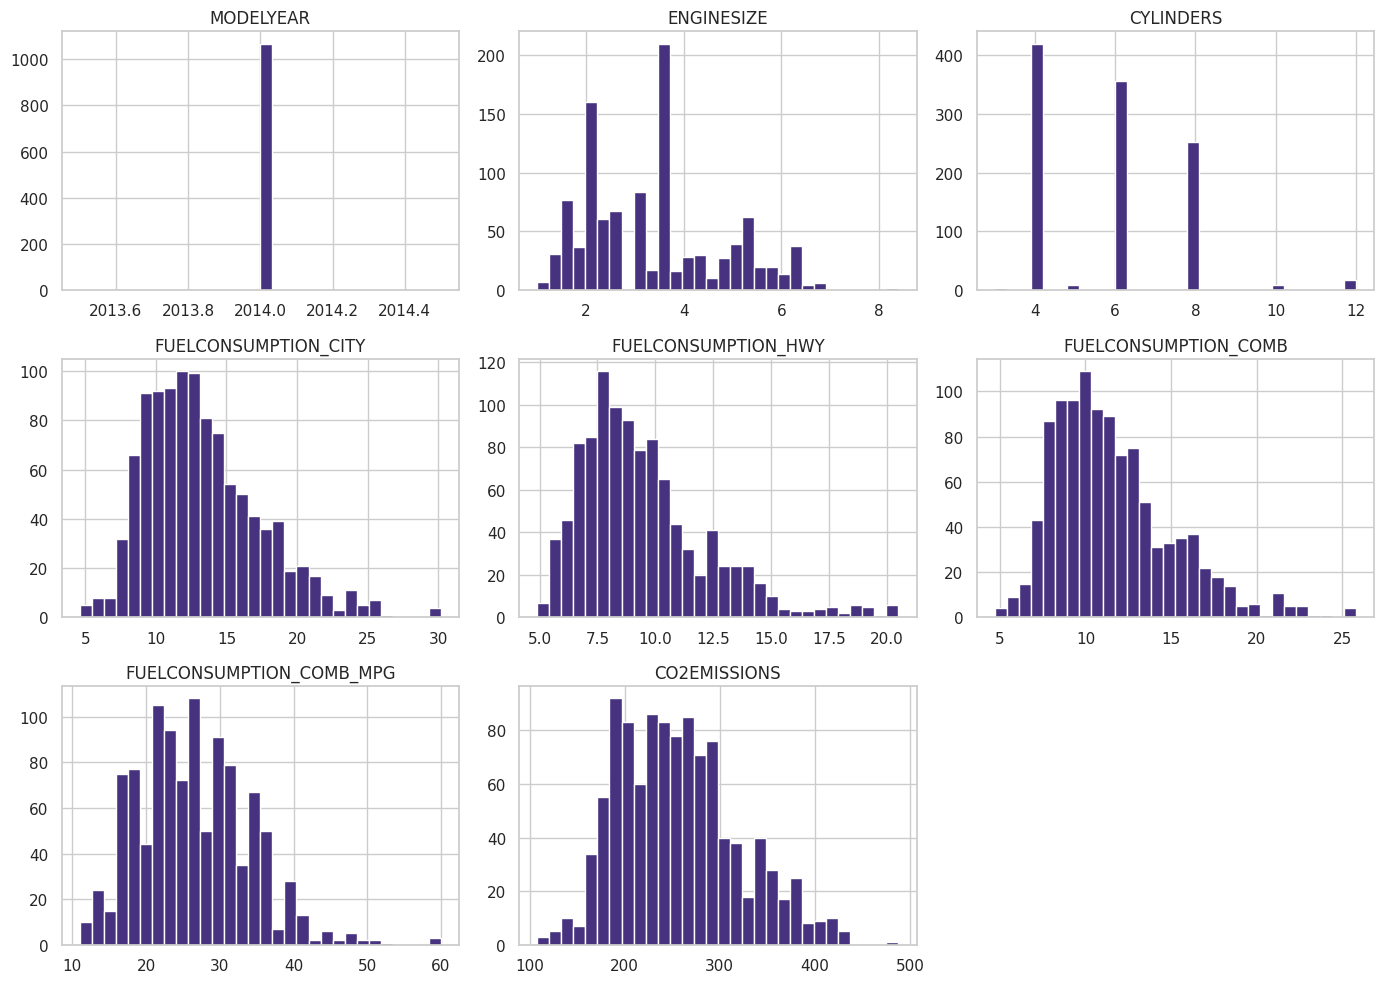

In [99]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()


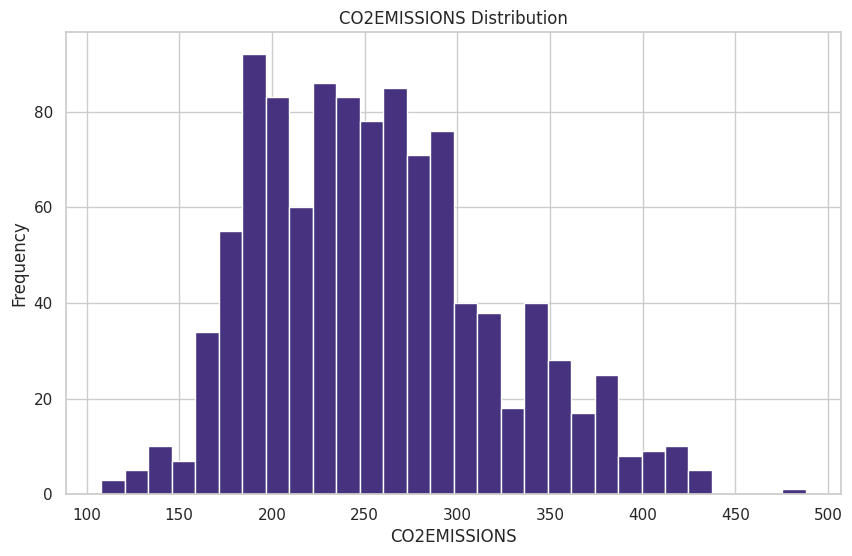

In [100]:
plt.hist(df["CO2EMISSIONS"],bins=30)
plt.xlabel("CO2EMISSIONS")
plt.ylabel("Frequency")
plt.title("CO2EMISSIONS Distribution")
plt.show()


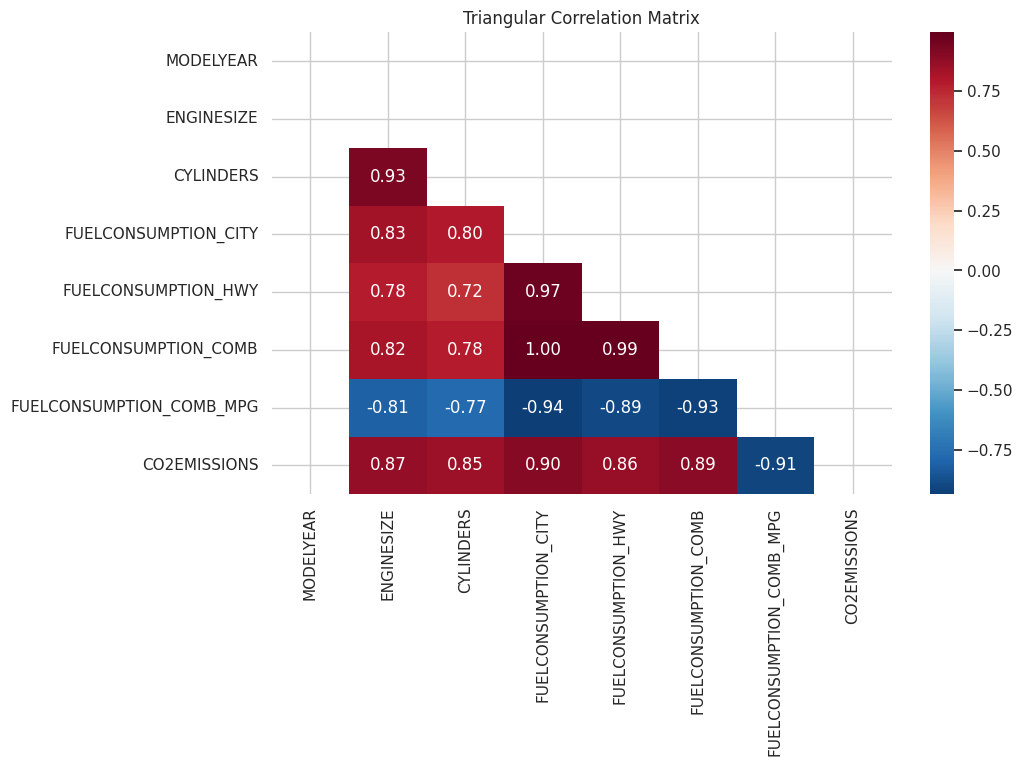

In [101]:
corr = df.corr(numeric_only=True)
# corr["CO2EMISSIONS"].sort_values(ascending=False)

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Triangular Correlation Matrix')
plt.show()

In [102]:
df.var(numeric_only=True).sort_values()

MODELYEAR                      0.000000
ENGINESIZE                     2.004759
CYLINDERS                      3.230817
FUELCONSUMPTION_HWY            7.809289
FUELCONSUMPTION_COMB          12.149371
FUELCONSUMPTION_CITY          16.820279
FUELCONSUMPTION_COMB_MPG      55.781509
CO2EMISSIONS                4016.048970
dtype: float64

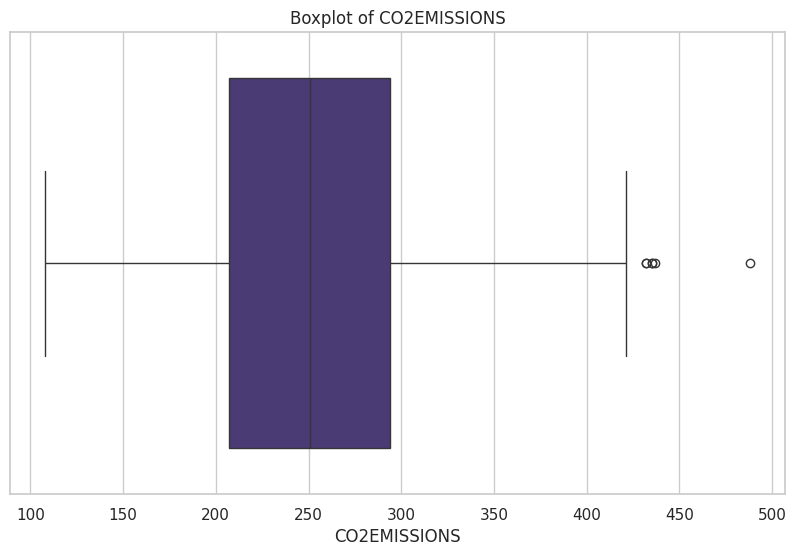

In [113]:
def plot_box(df, col):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

plot_box(df, "CO2EMISSIONS")

In [104]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

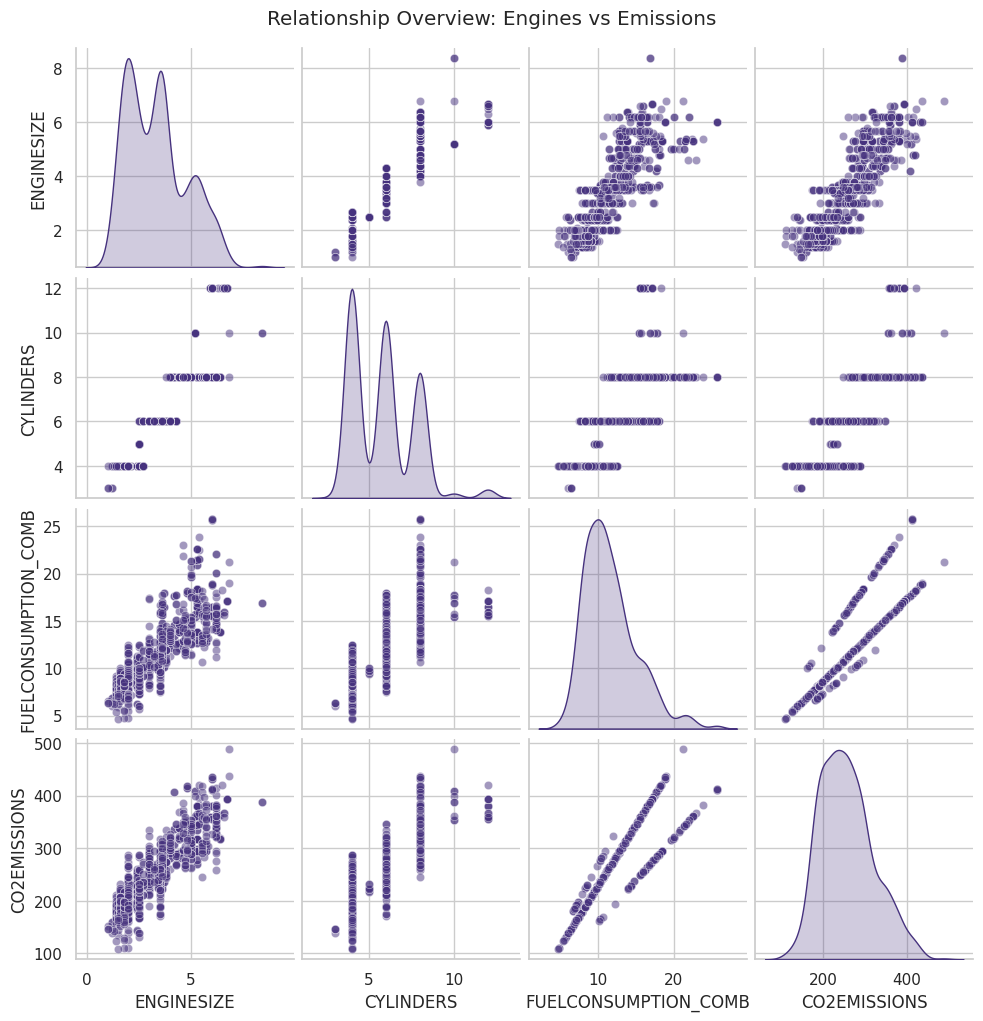

In [105]:
key_features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
sns.pairplot(df[key_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Relationship Overview: Engines vs Emissions", y=1.02)
plt.show()

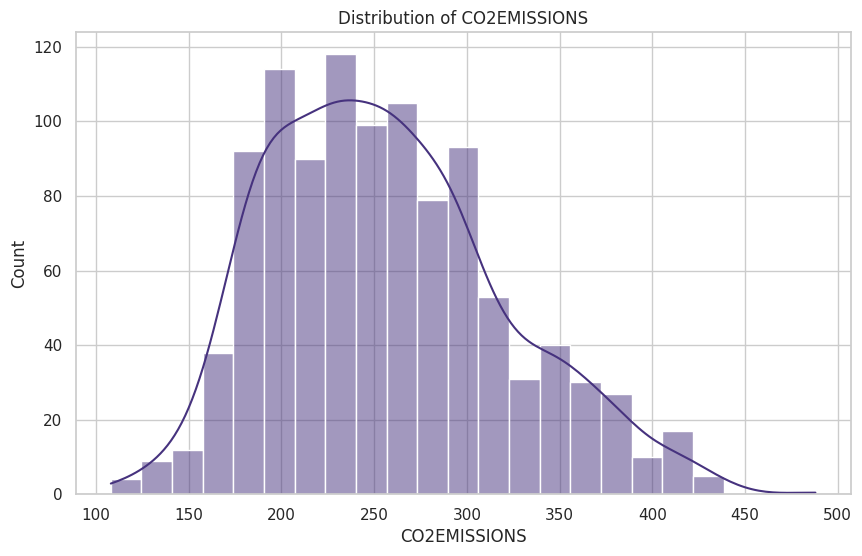

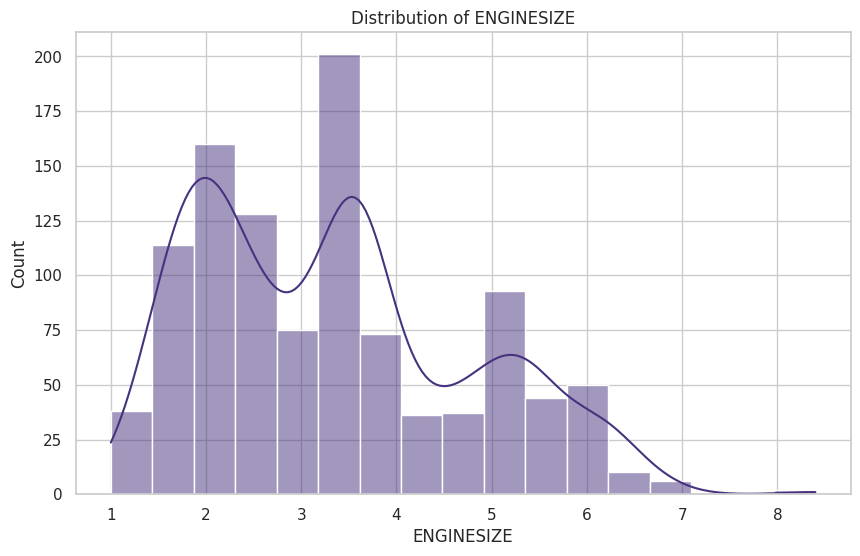

In [109]:
def plot_distribution(df, col):
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


plot_distribution(df, "CO2EMISSIONS")
plot_distribution(df, "ENGINESIZE")